## BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021


## Session-10: Regression Modeling

### Simple and Multiple Linear Regression

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly on the covariates $\textbf{x}_i$.

In the **simple** linear regression, with a single variable, we describe the relationship between the predictor and the response with a straight line. The model is:
$$ \textbf{y}  =  \beta_0 + \beta_1 \textbf{x}_1 $$

The parameter $\beta_0$ is called the constant term or the *intercept*.
The parameter $\beta_1$ is called the *coefficient* term or slope of the regression line.

In the case of *multiple* linear regression we extend this idea by fitting a m-dimensional hyperplane to our `m` predictors.

$$ \textbf{y}  =  \beta_0+ \beta_1 \textbf{x}_1  + \dots + \beta_m \textbf{x}_{m} $$

The $\beta_i$ are termed the *parameters* of the model or the coefficients.

### Algorithm for Fitting: Ordinary Least Squares

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $\beta$'s 
of the simple linear regression: $\textbf{y} = \beta_0+\beta_1 \textbf{x}$, 
are chosen to minimize the **sum of the square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||\beta_0 + \beta_1 \textbf{x} -  \textbf{y} ||^2 = \sum_{j=1}^n (\beta_0+\beta_1 x_{j} -  y_j )^2,$$ with respect to $\beta_0, \beta_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.


### Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions (e.g., curves) you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

### Sales and Advertising Data
For this example, we are going to use the `Advertising.csv` file available on Canvas.

In [2]:
# our usual first step: get the modules loaded.
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [3]:
advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


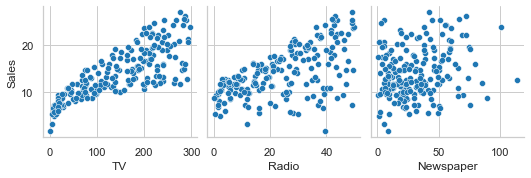

In [6]:
sns.pairplot(data=advertising, y_vars=['Sales'], x_vars=['TV', 'Radio', 'Newspaper'], diag_kind = None);

In [7]:
advertising.corr() #correlation matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


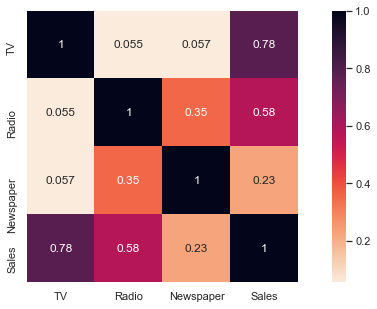

In [34]:
# Draw a correlation heatmap 
corrmat = advertising.corr()
sns.heatmap(corrmat, square = True, cmap="rocket_r",annot=True); 

You can try various colors `OrRd`, `PuBu`, `YlOrBr`, `rocket_r` or hexcodes (`#67E568`) to pass to the color map or use color palettes. There is a lot of flexibility. Here are some resources for fiddling with colors: [Seaborn color palette documentation](http://seaborn.pydata.org/tutorial/color_palettes.html)

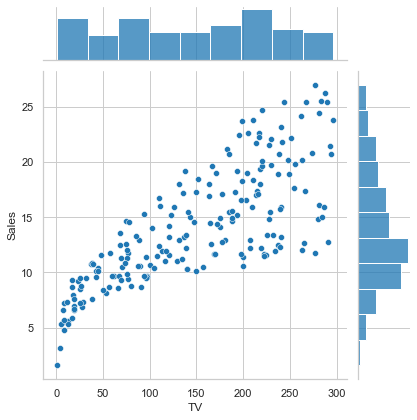

In [9]:
tv_sales=sns.jointplot(x="TV", y="Sales", data=advertising)
tv_sales.savefig("TVSales.jpg") # save the figure to working directory

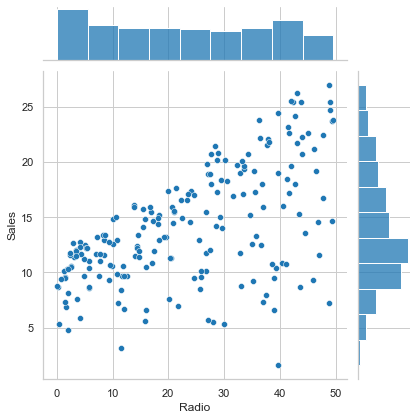

In [10]:
sns.jointplot(x = advertising.Radio, y = advertising.Sales);

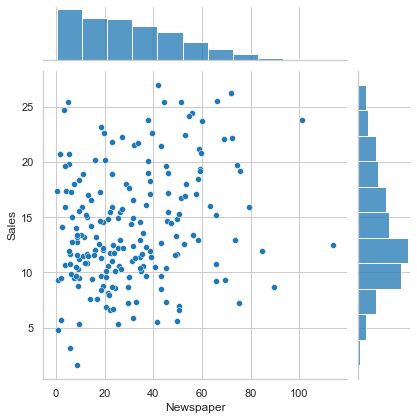

In [11]:
sns.jointplot(x = advertising.Newspaper, y = advertising.Sales);

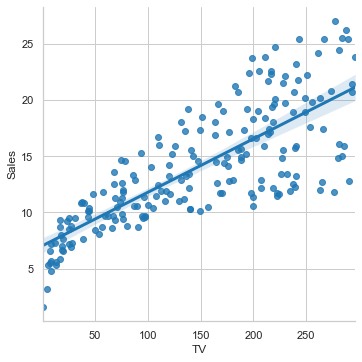

In [12]:
sns.lmplot(x = "TV", y = "Sales", data = advertising, order=1, ci=95);

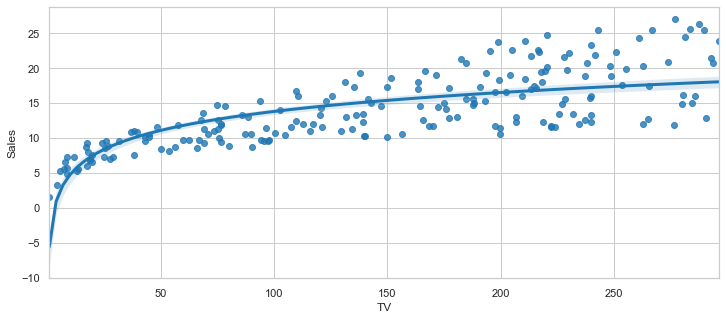

In [13]:
sns.regplot(x="TV", y="Sales", data=advertising, logx=True);

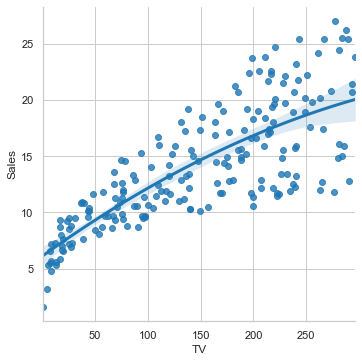

In [14]:
sns.lmplot(x = "TV", y = "Sales", data = advertising, order=2, ci=95);

### Predictive Modeling with `scikit-learn`
We can use the [`sklearn`](https://scikit-learn.org/stable/) library to fit various regression models to predict `Sales`.

In [15]:
# sklearn module imports
import sklearn.linear_model as sklm
from sklearn import metrics
from sklearn.model_selection import train_test_split

#### Example 1: Simple Linear Regression

In [16]:
advertising.TV.shape

(200,)

In [17]:
# estimating Sales ~ TV model using sklearn

X = advertising.TV.values.reshape(200,1) #Sklearn expects X variables in this array format
Y = advertising.Sales

tv_reg=sklm.LinearRegression() 

# let's split the dataset to training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

tv_reg.fit(X_train, Y_train)

LinearRegression()

In [18]:
#Get the parameters from the fitting

print('Intercept:', tv_reg.intercept_)
print('Beta 1:', tv_reg.coef_)

Intercept: 7.1196384305929525
Beta 1: [0.04652973]


In [19]:
# making predictions
Y_predict = tv_reg.predict(X_test)

In [20]:
# compare actual values with the predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
df

,Actual,Predicted
95,16.9,14.717944
15,22.4,16.211548
30,21.4,20.748197
158,7.3,7.664036
128,24.7,17.370139
115,12.6,10.614021
69,22.3,17.207285
170,8.4,9.446125
174,11.5,17.467851
45,14.9,15.266995


In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print("R-Squared:", metrics.r2_score(Y_test, Y_predict))

Mean Absolute Error: 2.444420003751042
Mean Squared Error (MSE): 10.204654118800956
Root Mean Squared Error: 3.194472431998898
R-Squared: 0.6766954295627077


#### Example 2 - Multiple Linear Regression

In [22]:
# estimating Sales ~ TV + Radio + Newspaper model
m_reg=sklm.LinearRegression() 

X_m = advertising[['TV','Radio', 'Newspaper']]
Y_m = advertising.Sales

# let's split the dataset to training and test sets
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)

m_reg.fit(X_train_m, Y_train_m)

LinearRegression()

In [23]:
#Get the parameters from the fitting
print('Intercept:', m_reg.intercept_)

coeff_df = pd.DataFrame(m_reg.coef_, X_m.columns, columns=['Coefficient'])
coeff_df

Intercept: 2.979067338122631


,Coefficient
TV,0.044730
Radio,0.189195
Newspaper,0.002761


In [24]:
# making predictions
Y_predict_m = m_reg.predict(X_test_m)

# compare actual values with the predicted
df_m = pd.DataFrame({'Actual': Y_test_m, 'Predicted': Y_predict_m})
df_m

,Actual,Predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_m, Y_predict_m))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test_m, Y_predict_m))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_m, Y_predict_m)))
print("R-Squared:", metrics.r2_score(Y_test_m, Y_predict_m))

Mean Absolute Error: 1.4607567168117597
Mean Squared Error (MSE): 3.174097353976103
Root Mean Squared Error: 1.7815996615334497
R-Squared: 0.899438024100912


### Explanatory Modeling
The `statsmodels` package is tailored towards an explanation-oriented approach, and simulates "R"-like output. 

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
# estimating Sales ~ TV model using sklearn

formula='Sales ~ TV'
model = smf.ols(formula, data=advertising) 
tv_reg = model.fit()
tv_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.47e-42
Time:                        15:02:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
formula='Sales ~ TV + Radio + Newspaper'
model = smf.ols(formula, data=advertising) 
m_reg = model.fit()
m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.58e-96
Time:                        15:02:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Exploring Interactions:
formula='Sales ~ TV + Radio + Newspaper + TV*Radio'
model = smf.ols(formula, data=advertising) 
i_reg = model.fit()
i_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          2.92e-144
Time:                        15:02:25   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.000       6.229       7.228
TV             0.0191      0.002     12.633      0.000       0.016       0.022
Radio          0.0280      0.009      3.062      0.003       0.010       0.046
Newspaper      0.0014      0.003      0.438      0.662      -0.005       0.008
TV:Radio       0.0011   5.26e-05     20.686      0.000       0.001       0.001
==============================================================================
Omnibus:                      126.161   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.463
Skew:                          -2.291   Prob(JB):                    1.10e-244
Kurtosis:                      13.669   Cond. No.                     1.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""